In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [68]:
df = pd.read_csv("/home/agustin/coding/datasets/breast_cancer/breast_cancer.csv")
df.shape

(569, 33)

In [69]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [70]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [71]:
df.isna().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [72]:
df.duplicated().sum()

0

In [73]:
dataset = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
         'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
         'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

/tmp/ipykernel_15047/6334320.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


<Axes: >

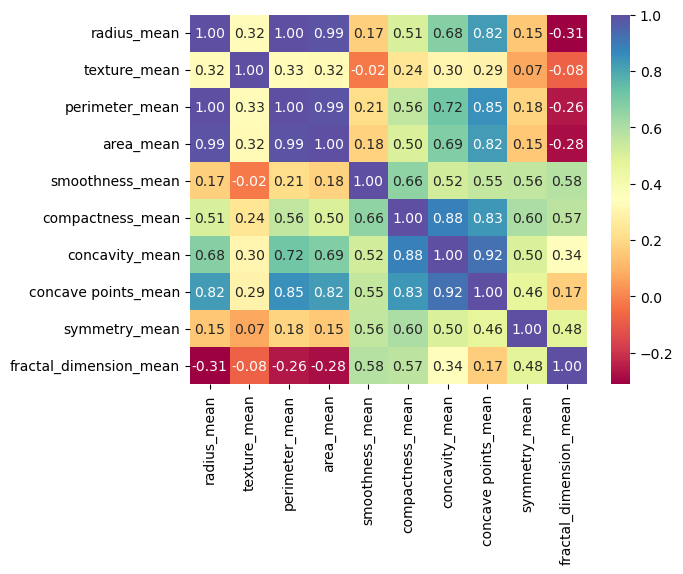

In [74]:
corr = dataset.corr()
sns.heatmap(corr, 
            cmap="Spectral",
            fmt=".2f",
            annot=True)

In [75]:
dataset = df[['diagnosis', 'perimeter_mean', 'smoothness_mean', 'compactness_mean',
         'concave points_mean', 'symmetry_mean']]

/tmp/ipykernel_15047/6334320.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


<Axes: >

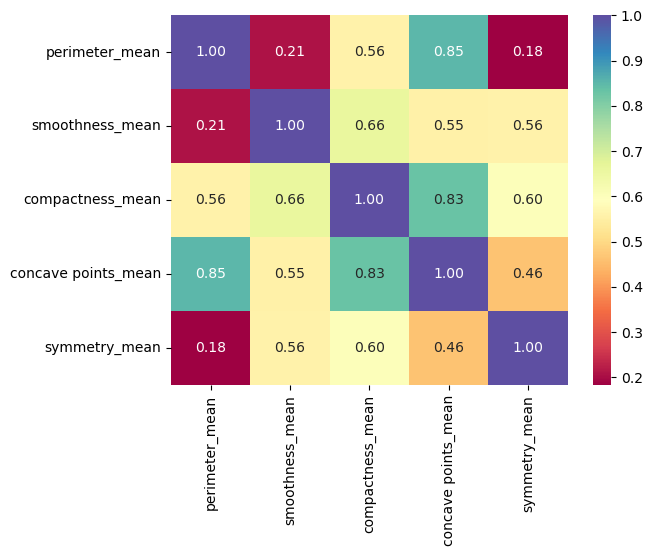

In [76]:
corr = dataset.corr()
sns.heatmap(corr, 
            cmap="Spectral",
            fmt=".2f",
            annot=True)

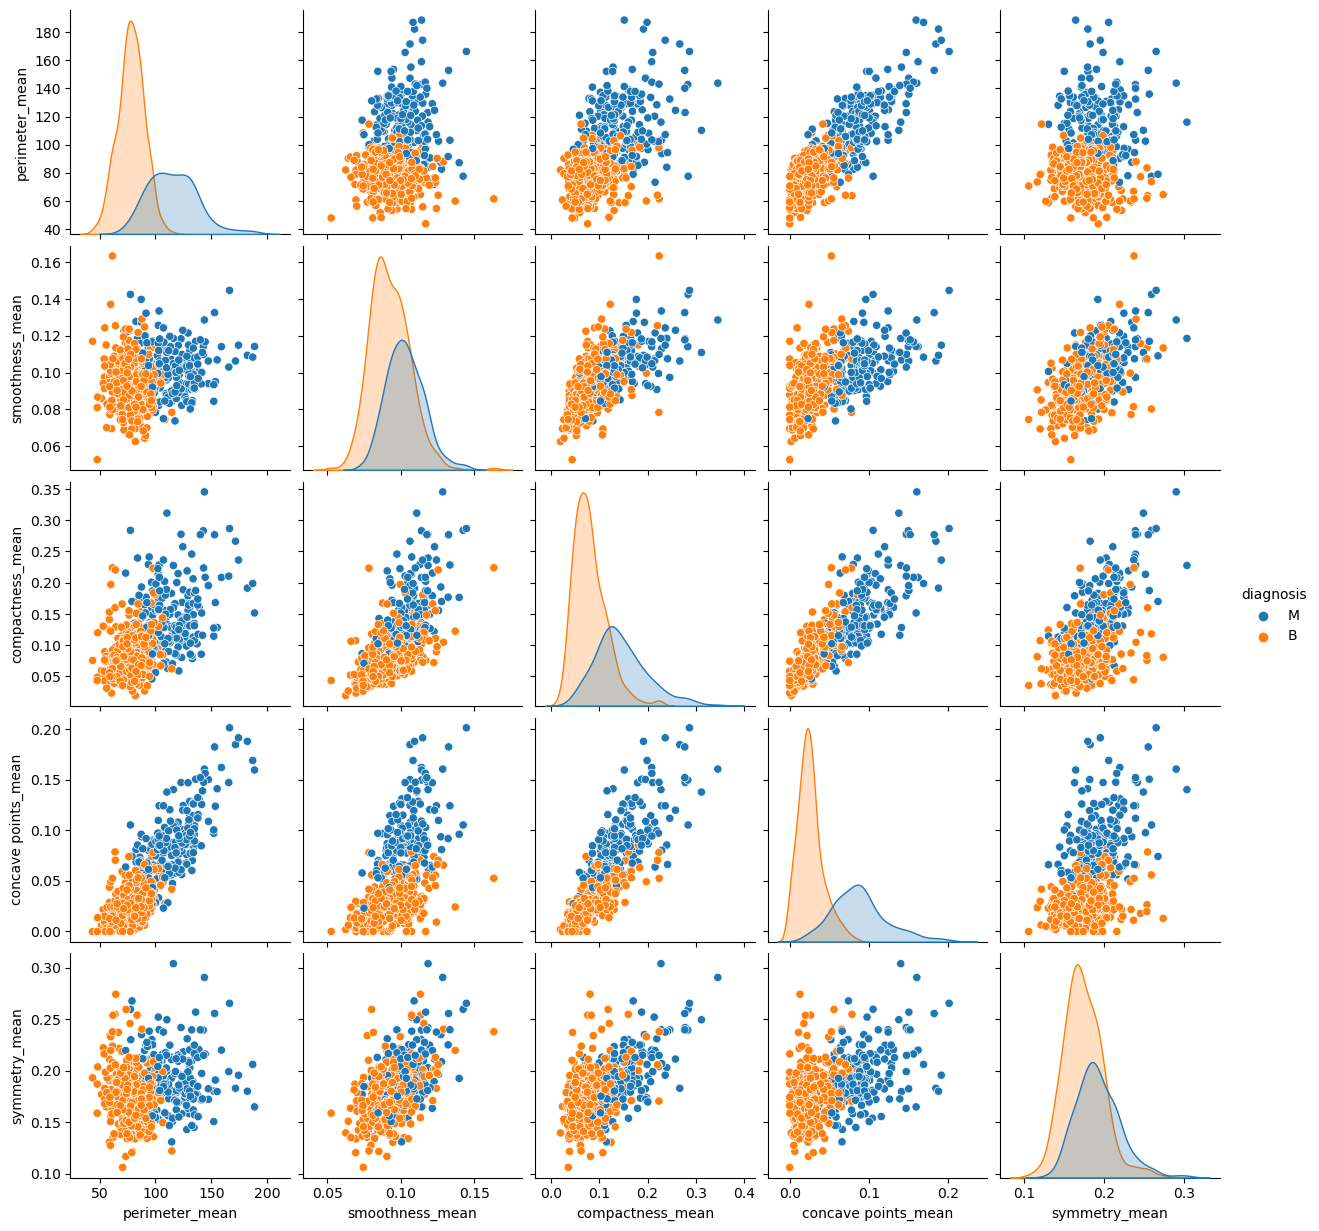

In [77]:
sns.pairplot(dataset,hue="diagnosis")

In [78]:
dataset.describe()

,perimeter_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,91.969033,0.096360,0.104341,0.048919,0.181162
std,24.298981,0.014064,0.052813,0.038803,0.027414
min,43.790000,0.052630,0.019380,0.000000,0.106000
25%,75.170000,0.086370,0.064920,0.020310,0.161900
50%,86.240000,0.095870,0.092630,0.033500,0.179200
75%,104.100000,0.105300,0.130400,0.074000,0.195700
max,188.500000,0.163400,0.345400,0.201200,0.304000


<Axes: xlabel='perimeter_mean', ylabel='Count'>

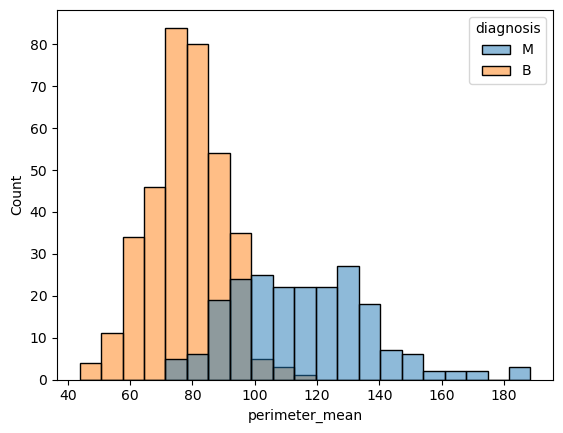

In [79]:
sns.histplot(dataset,x="perimeter_mean",hue="diagnosis")

<Axes: xlabel='concave points_mean', ylabel='Count'>

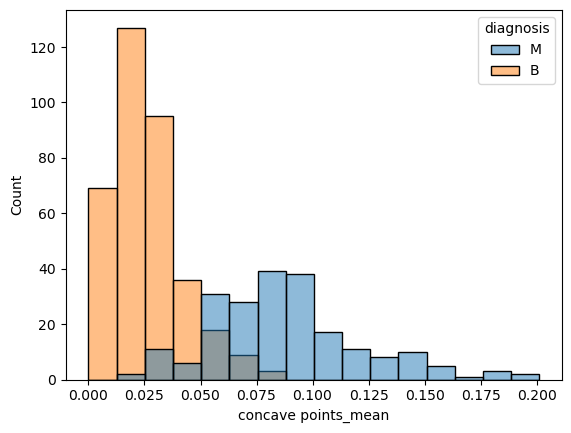

In [80]:
sns.histplot(dataset,x="concave points_mean",hue="diagnosis")

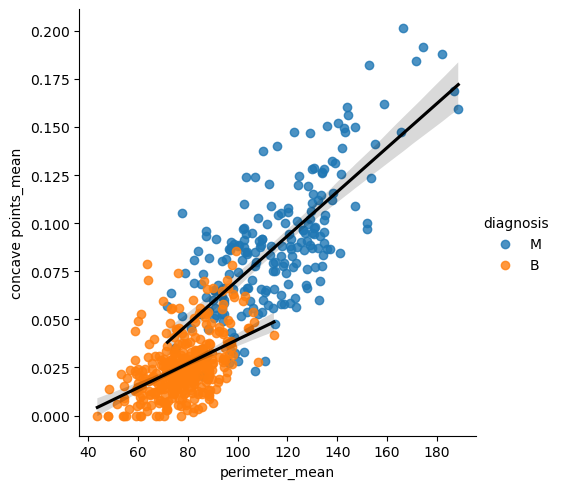

In [112]:
sns.lmplot(dataset,x="perimeter_mean", y="concave points_mean",hue="diagnosis", line_kws={"color":"black"})

In [83]:
dummy = pd.get_dummies(dataset['diagnosis'])
dataset_binary = pd.concat((dataset,dummy), axis=1)

dataset_binary = dataset_binary.drop(['B'],axis=1)
dataset_binary = dataset_binary.drop(['diagnosis'],axis=1)
dataset_binary.rename(columns = {'M':'diagnosis'}, inplace = True)
dataset_binary.head()


,perimeter_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,diagnosis
0,122.80,0.11840,0.27760,0.14710,0.2419,1
1,132.90,0.08474,0.07864,0.07017,0.1812,1
2,130.00,0.10960,0.15990,0.12790,0.2069,1
3,77.58,0.14250,0.28390,0.10520,0.2597,1
4,135.10,0.10030,0.13280,0.10430,0.1809,1


ModuleNotFoundError: No module named 'statsmodels'

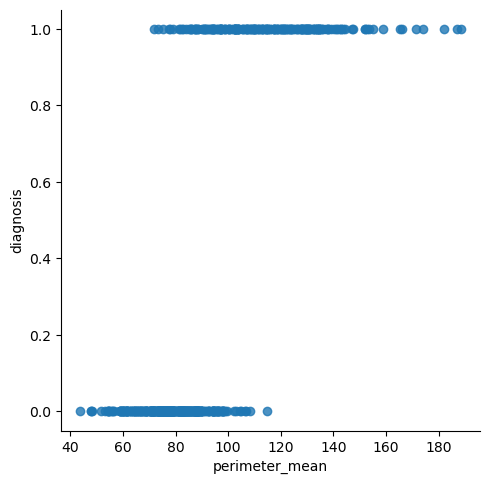

In [103]:
sns.lmplot(dataset_binary,
           x="perimeter_mean", 
           y="diagnosis", 
           logistic=True,n_boot=100)